# 1. Sebuah data transaksi saham telah dikumpulkan dan disimpan pada file [berikut](https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json). Buatlah data visualization untuk mendapatkan informasi berikut:

## Proses Transformasi Data Source

In [170]:
def convert_to_idr(price, currency):
    if currency == 'ZAR':
        return price * 1000
    elif currency == 'HRK':
        return price * 2200
    elif currency == 'CNY':
        return price * 2000
    elif currency == 'PEN':
        return price * 3500
    elif currency == 'LYD':
        return price * 7200
    elif currency == 'USD':
        return price * 15000
    elif currency == 'PHP':
        return price * 300
    elif currency == 'RUB':
        return price * 200
    elif currency == 'SEK':
        return price * 1700
    elif currency == 'AZN':
        return price * 1000
    elif currency == 'ARS':
        return price * 300
    elif currency == 'CZK':
        return price * 650
    elif currency == 'EUR':
        return price * 18000
    elif currency == 'PLN':
        return price * 4000
    elif currency == 'THB':
        return price * 500
    elif currency == 'BGN':
        return price * 9000
    elif currency == 'YER':
        return price * 60
    elif currency == 'XOF':
        return price * 30
    elif currency == 'VEF':
        return price * 1.5
    elif currency == 'UAH':
        return price * 600
    elif currency == 'COP':
        return price * 4
    elif currency == 'ILS':
        return price * 4500
    elif currency == 'PKR':
        return price * 90
    elif currency == 'DKK':
        return price * 2400
    elif currency == 'VND':
        return price * 0.65
    elif currency == 'BRL':
        return price * 2800
    elif currency == 'UYU':
        return price * 400
    elif currency == 'MKD':
        return price * 280
    elif currency == 'MAD':
        return price * 1700
    elif currency == 'GHS':
        return price * 2700
    elif currency == 'LAK':
        return price * 1.6
    elif currency == 'MUR':
        return price * 350
    elif currency == 'LRD':
        return price * 70
    elif currency == 'CAD':
        return price * 11500
    elif currency == 'MXN':
        return price * 800
    elif currency == 'JPY':
        return price * 140
    elif currency == 'PAB':
        return price * 15000
    elif currency == 'XCD':
        return price * 15000
    elif currency == 'UZS':
        return price * 1.4
    elif currency == 'ALL':
        return price * 150
    elif currency == 'AFN':
        return price * 180
    elif currency == 'AMD':
        return price * 30
    elif currency == 'CUP':
        return price * 700
    elif currency == 'RSD':
        return price * 140
    elif currency == 'UGX':
        return price * 4
    elif currency == 'TMT':
        return price * 4300
    elif currency == 'CVE':
        return price * 140
    elif currency == 'MYR':
        return price * 3600
    elif currency == 'AED':
        return price * 4100
    elif currency == 'IRR':
        return price * 0.35
    elif currency == 'SSP':
        return price * 330
    elif currency == 'BSD':
        return price * 15000
    elif currency == 'AOA':
        return price * 28
    elif currency == 'BYR':
        return price * 5
    elif currency == 'KZT':
        return price * 35
    elif currency == 'JOD':
        return price * 21100
    elif currency == 'NPR':
        return price * 120
    elif currency == 'BDT':
        return price * 180
    elif currency == 'KES':
        return price * 140
    elif currency == 'NGN':
        return price * 35
    elif currency == 'TZS':
        return price * 6.5
    elif currency == 'KHR':
        return price * 3.7
    elif currency == 'CRC':
        return price * 25
    elif currency == 'BOB':
        return price * 2200
    elif currency == 'GTQ':
        return price * 1950
    elif currency == 'LBP':
        return price * 10
    elif currency == 'SYP':
        return price * 30
    elif currency == 'MNT':
        return price * 5
    elif currency == 'CHF':
        return price * 16500
    elif currency == 'XAF':
        return price * 30
    elif currency == 'BAM':
        return price * 9000
    elif currency == 'NZD':
        return price * 10500
    elif currency == 'PGK':
        return price * 4300
    elif currency == 'KRW':
        return price * 13
    elif currency == 'MGA':
        return price * 3.8
    elif currency == 'CLP':
        return price * 20
    else:
        return price

- Harga beli saham yang tertinggi dalam rupiah (IDR). Pastikan semua nilai transaksi sudah dikonversi dalam satuan rupiah.

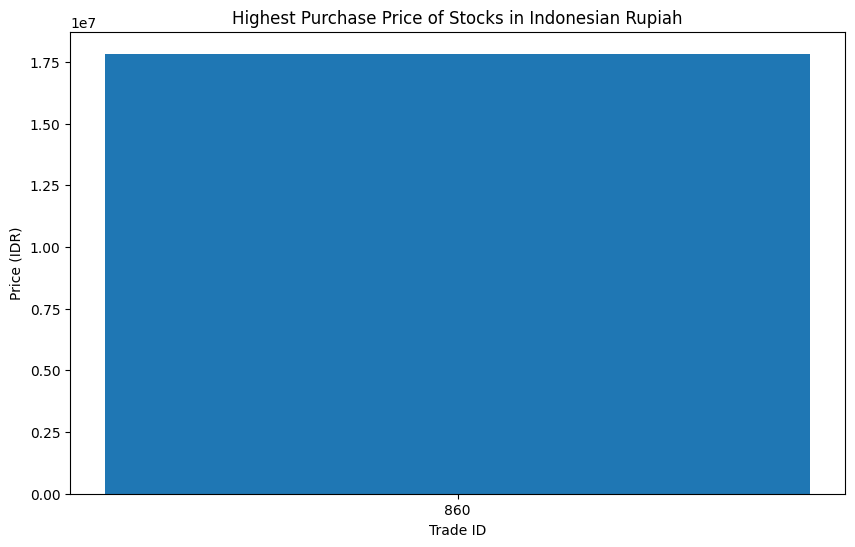

In [171]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
from forex_python.converter import CurrencyRates

url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
response = requests.get(url)
data = response.json()

df_trade = pd.DataFrame(data)

df_trade['trade_price_IDR'] = df_trade.apply(lambda row: convert_to_idr(row["trade_price"], row['currency']), axis=1)

trade_price_buy_max = df_trade[df_trade["trade_type"] == "buy"]['trade_price_IDR'].max()
id_trade_max = df_trade[(df_trade["trade_type"] == "buy") & (df_trade["trade_price_IDR"] == trade_price_buy_max)].iloc[0]['trade_id']

plt.figure(figsize=(10, 6))
plt.bar(str(id_trade_max), trade_price_buy_max)
plt.xlabel('Trade ID')
plt.ylabel('Price (IDR)')
plt.title('Highest Purchase Price of Stocks in Indonesian Rupiah')
plt.show()


- Perkembangan transaksi pembelian saham TSLA.

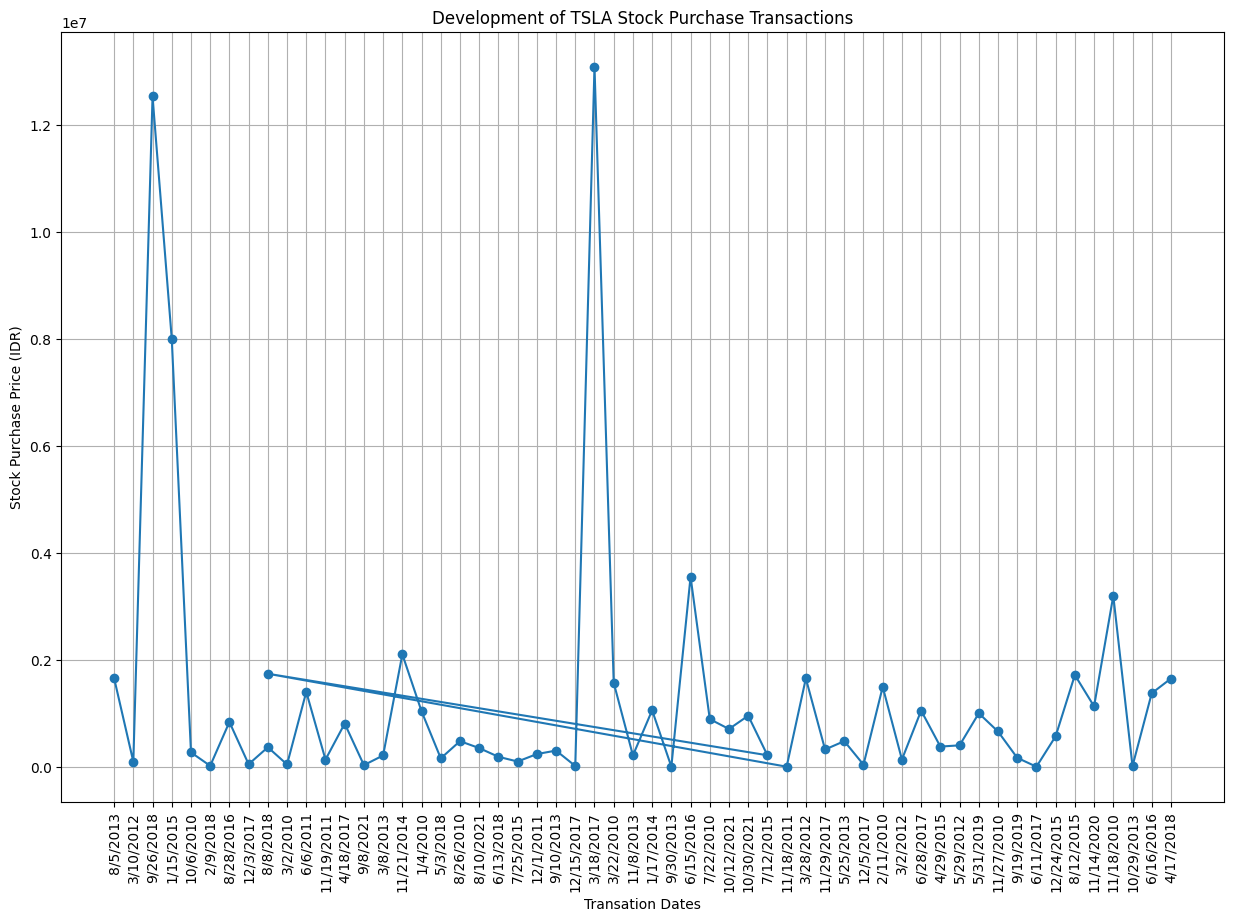

In [172]:
tsla_buys = df_trade[(df_trade['trade_type'] == 'buy') & (df_trade['stock_symbol'] == 'TSLA')]
date = tsla_buys['trade_date']
purchase_buy_tsla = tsla_buys["trade_price_IDR"]

plt.figure(figsize=(15, 10))
plt.plot(date, purchase_buy_tsla, marker='o')
plt.title('Development of TSLA Stock Purchase Transactions')
plt.xlabel('Transation Dates')
plt.ylabel('Stock Purchase Price (IDR)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

- Persentase jenis saham yang dilakukan proses jual-beli. Jenis saham dapat dilihat pada bagian stock_symbol.

<Figure size 2000x1000 with 0 Axes>

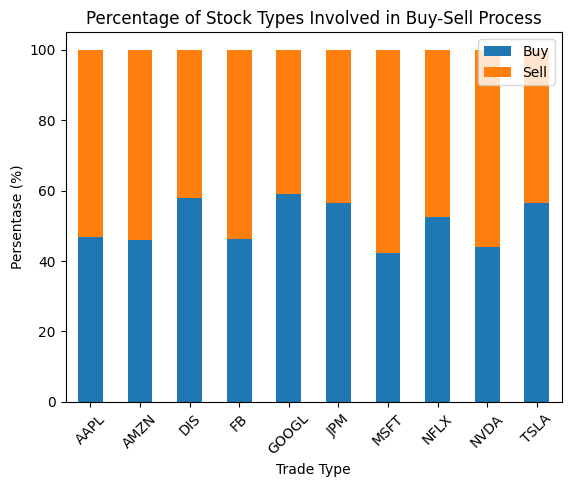

In [173]:
type_trade_result = df_trade.groupby(["stock_symbol", "trade_type"]).size().unstack(fill_value=0)

type_trade_result['total'] = type_trade_result['buy'] + type_trade_result['sell']

type_trade_result['buy_percentage'] = (type_trade_result['buy'] / type_trade_result['total']) * 100
type_trade_result['sell_percentage'] = (type_trade_result['sell'] / type_trade_result['total']) * 100

plt.figure(figsize=(20, 10))
type_trade_result[['buy_percentage', 'sell_percentage']].plot(kind='bar', stacked=True)
plt.title('Percentage of Stock Types Involved in Buy-Sell Process')
plt.xlabel('Trade Type')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.legend(['Buy', 'Sell'])
plt.show()

- Jenis transaksi yang banyak dilakukan (buy / sell).

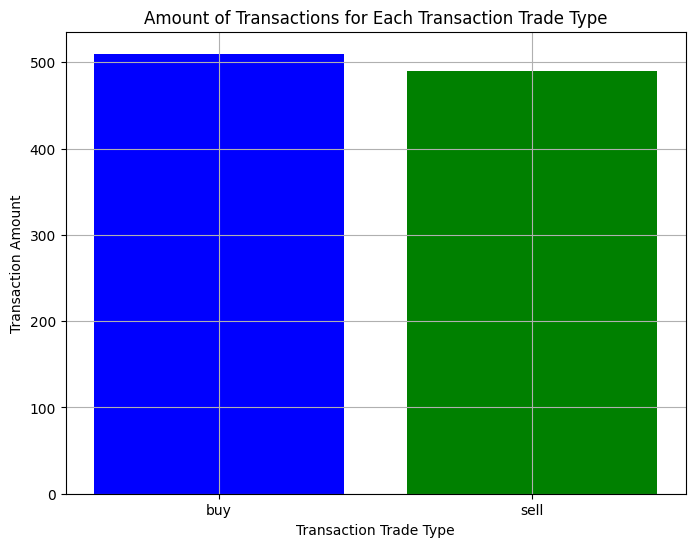

In [174]:
type_trade_count = df_trade.groupby(["trade_type"]).count()

type_trade_name = type_trade_count.index.get_level_values(0).tolist()
type_trade_count = type_trade_count["trade_id"]


plt.figure(figsize=(8, 6))
plt.bar(type_trade_name, type_trade_count, color=['blue', 'green'])
plt.title('Amount of Transactions for Each Transaction Trade Type')
plt.xlabel('Transaction Trade Type')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

- Persentase jenis transaksi yang dilakukan.

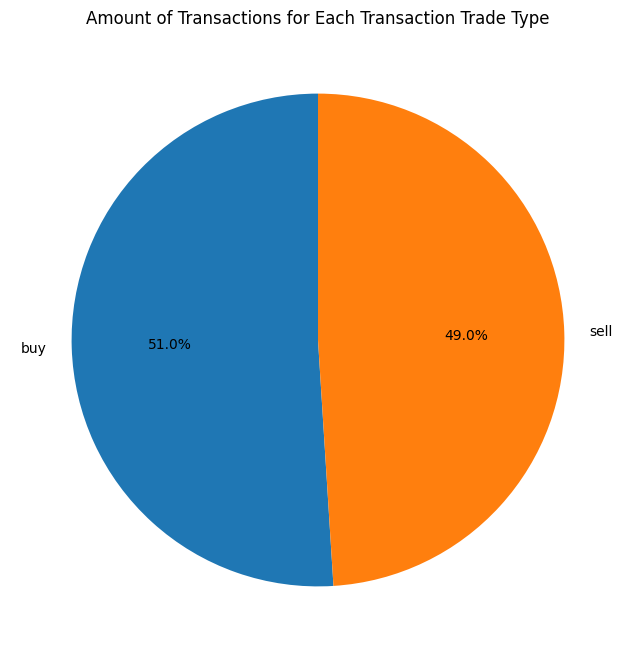

In [175]:
type_trade_count = df_trade.groupby(["trade_type"]).count()

type_trade_name = type_trade_count.index.get_level_values(0).tolist()
type_trade_count = type_trade_count["trade_id"]

plt.figure(figsize=(8, 8))
plt.pie(
    type_trade_count, 
    labels=type_trade_name,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Amount of Transactions for Each Transaction Trade Type")
plt.show()

- Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham.

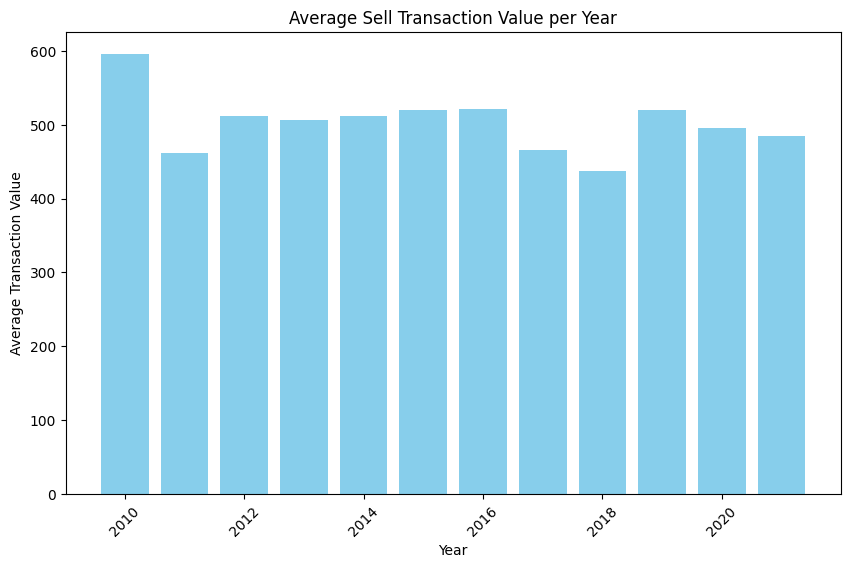

In [176]:
df_trade['trade_date'] = pd.to_datetime(df_trade['trade_date'])
df_trade['year'] = df_trade['trade_date'].dt.year

sell_transactions = df_trade[df_trade['trade_type'] == 'sell']
average_sell_per_year = sell_transactions.groupby('year')['trade_price'].mean()

transaction_year = average_sell_per_year.index
avg_sell_transactions = average_sell_per_year.values

plt.figure(figsize=(10, 6))
plt.bar(transaction_year, avg_sell_transactions, color='skyblue')
plt.title('Average Sell Transaction Value per Year')
plt.xlabel('Year')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.show()